In [2]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
bike = pd.read_csv(r"C:\Users\patri\Downloads\day.csv", parse_dates=['dteday'])
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.size

11680

In [6]:
bike.info()

#data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
#Checking the numerical columns data distribution statistics

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<AxesSubplot:>

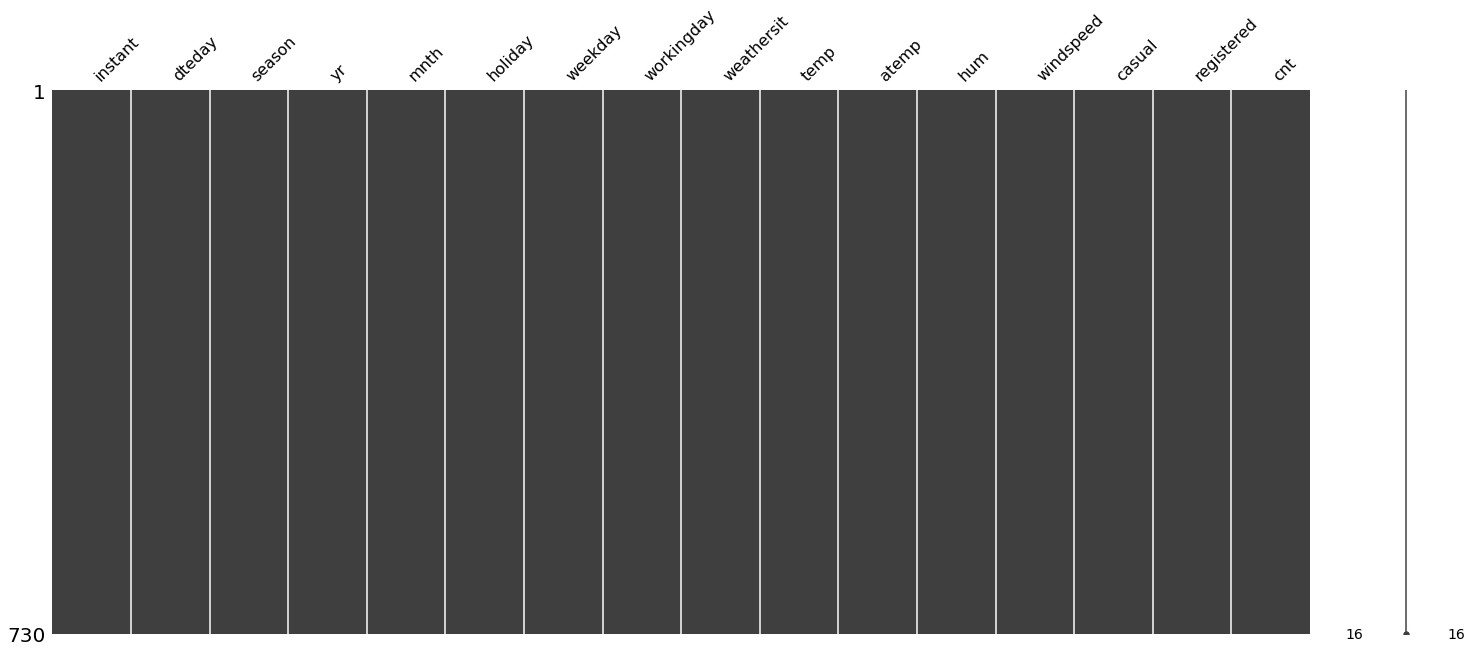

In [8]:
import missingno as mn

mn.matrix(bike)

#visualize any missing values in the data

In [9]:
bike.isnull().sum()

#double check make sure no missing data

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

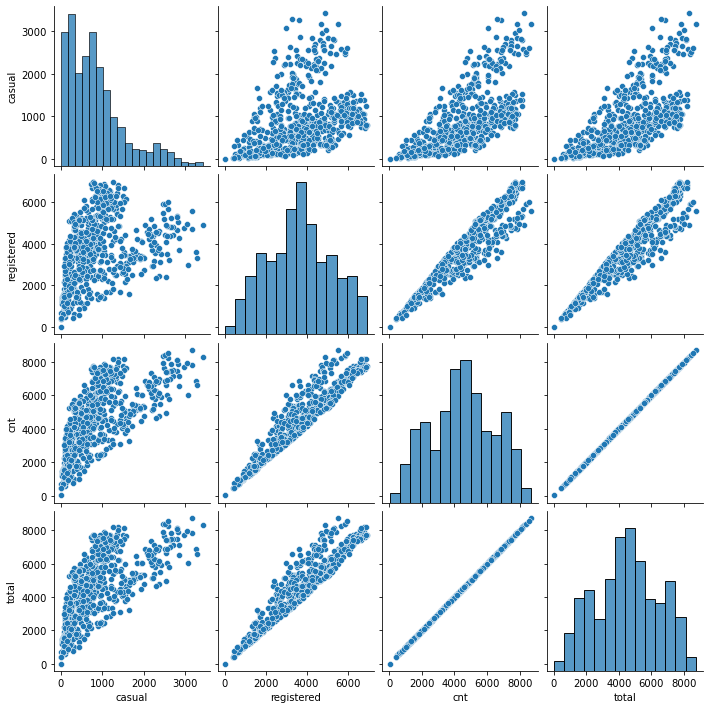

In [13]:
# Checking the relationship between casual, registered and cnt 

bike_cnt = bike[['casual','registered','cnt']]

# Creating a column whch will show the value of casual + registered

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt ['registered']

#plot 3 variables plus total column

sns.pairplot(bike_cnt)
plt.show

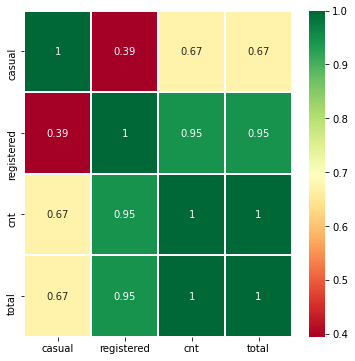

In [14]:
# checking the correlation of the variables with heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_cnt.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()



In [15]:
bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

#dropping columns that won't be needed

(730, 12)

In [16]:
#Converting season

bike.season.replace((1,2,3,4), ('W1_Spring','W2_Summer','W3_Fall','W4_Winter'), inplace=True)
bike.season.value_counts(normalize=True)

# replacing season with values of 1,2,3,4

W3_Fall      0.257534
W2_Summer    0.252055
W1_Spring    0.246575
W4_Winter    0.243836
Name: season, dtype: float64

In [17]:
#Converting mnth

bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts(normalize=True)

# replacing mnth with values of 1,2,3,4,5,6,7,8,9,10,11,12

Dec    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Mar    0.084932
May    0.084932
Jan    0.084932
Apr    0.082192
Sep    0.082192
Nov    0.082192
Jun    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [18]:
#Converting weathersit

bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True)

# replacing weathersit with values of 1,2,3,4

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [19]:
#Converting weathersit

bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts(normalize=True)

# replacing weathersit with values of 0,1,2,3,4,5,6

Monday       0.143836
Sunday       0.143836
Saturday     0.143836
Friday       0.142466
Tuesday      0.142466
Thursday     0.142466
Wednesday    0.141096
Name: weekday, dtype: float64

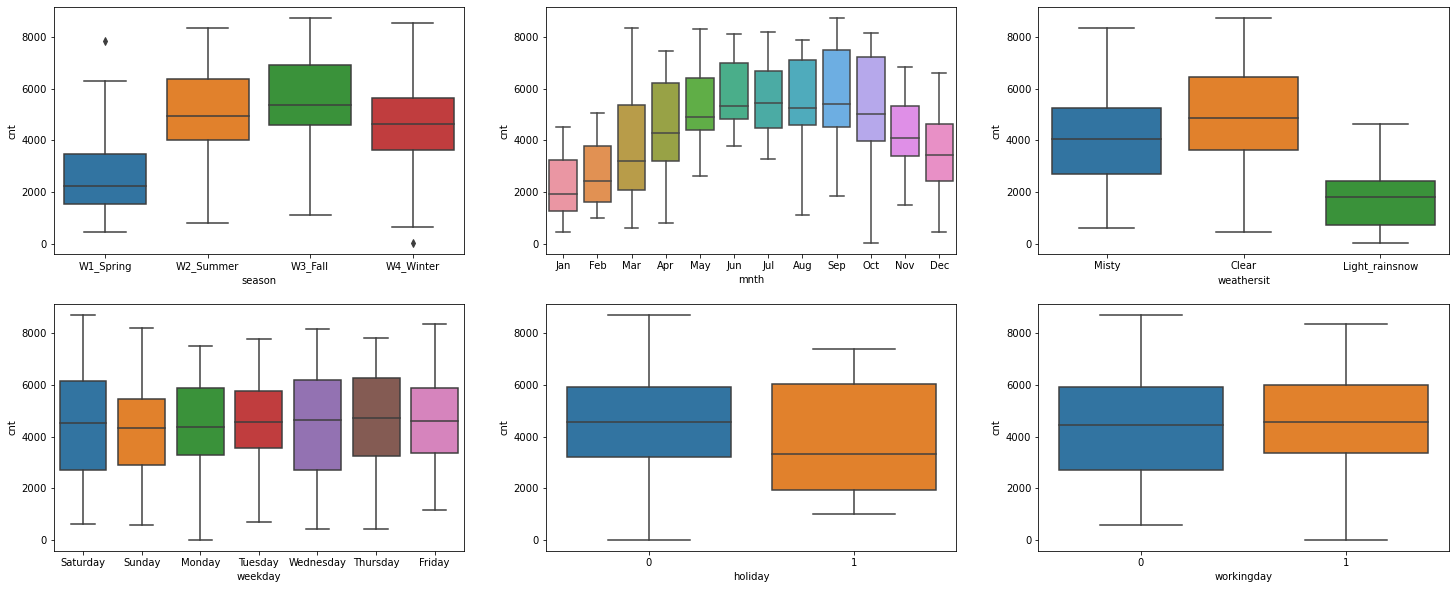

In [20]:
# boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [21]:
# function to generate statistics related to Categorical Variables

def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [22]:
# function to generate plots related to Categorical Variables

def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

In [23]:
categorical_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
W3_Fall,1061129,5644.30,188,32.24,25.75
W2_Summer,918589,4992.33,184,27.91,25.21
W4_Winter,841613,4728.16,178,25.57,24.38
W1_Spring,469514,2608.41,180,14.27,24.66


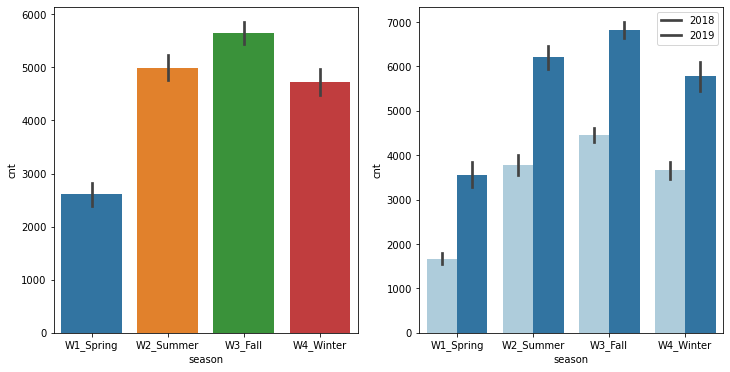

In [24]:
categorical_plot('season',12,6)

32% of the bookings happening in the fall.  Followed by summer and winter- 27% and 25%
Season looks to be a good predictor of the dependent variable

In [25]:
categorical_stats('mnth')

,sum,mean,count,sum_perc,count_perc
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


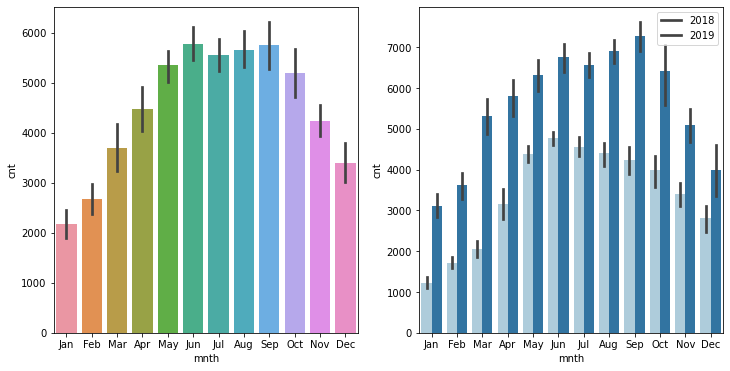

In [26]:
categorical_plot('mnth',12,6)

May to October are peak months to rent. 

In [27]:
categorical_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


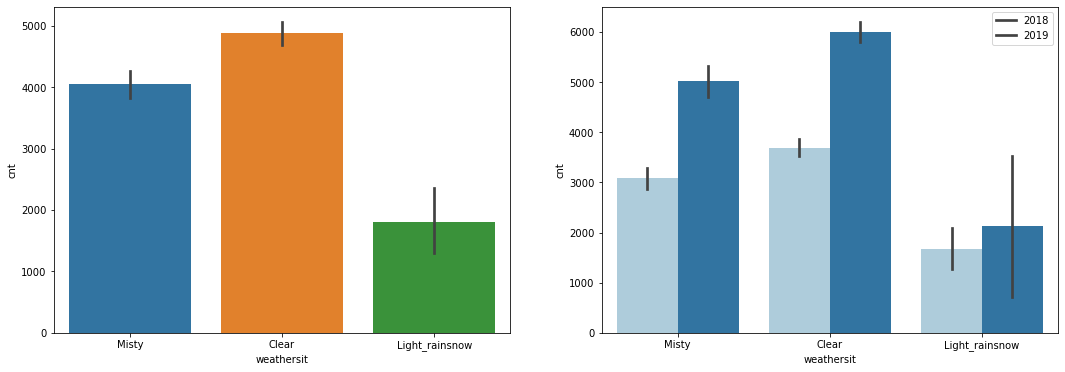

In [28]:
categorical_plot('weathersit',18,6)

68.6% of bookings happen on clear days followed by misty days with 30%

In [29]:
categorical_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


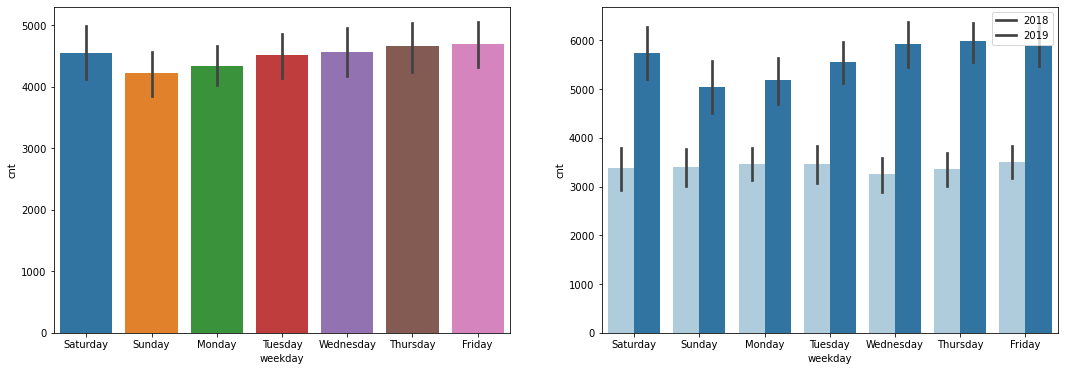

In [30]:
categorical_plot('weekday',18,6)

In [31]:
categorical_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


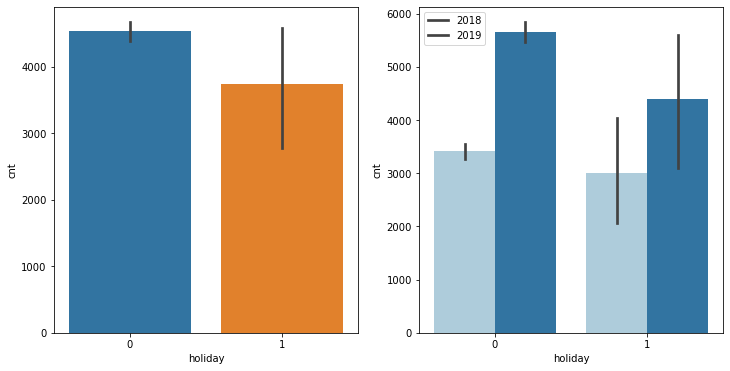

In [32]:
categorical_plot('holiday',12,6)

97% of bookings happen on non holidays

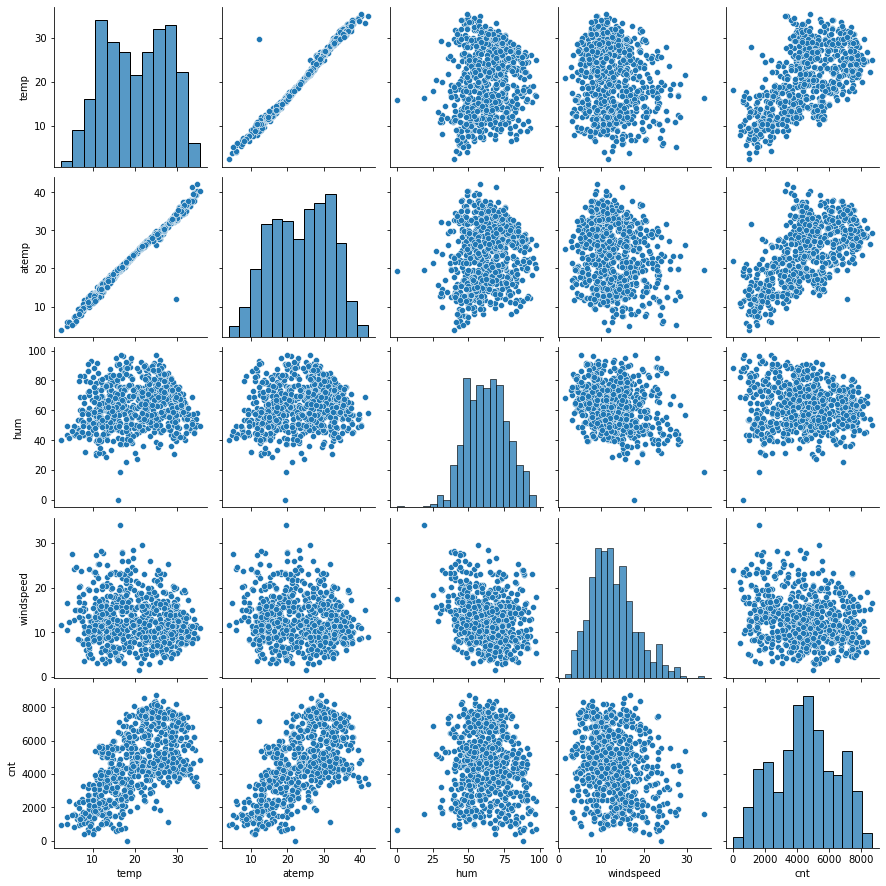

In [33]:
#Generating pairplot to check the relationships between numeric variables variables

bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

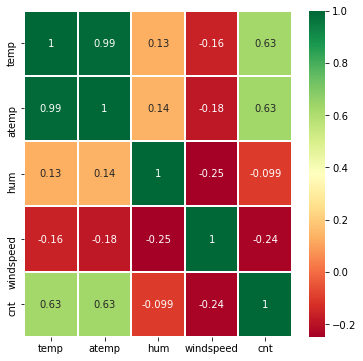

In [34]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (6,6))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="RdYlGn",linewidth =1)

can see a relationship between temperature and cnt

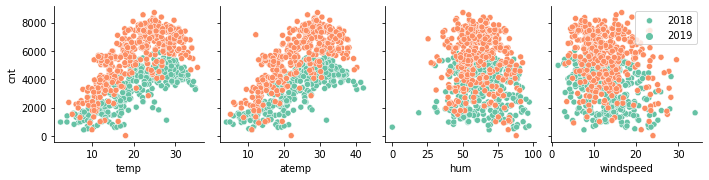

In [35]:
# Checking the impact of year against the numerical variable : 

ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

dummy variables

In [36]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,W2_Summer,W3_Fall,W4_Winter
0,0,0,0
1,0,0,0
2,0,0,0


In [37]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


In [41]:
month = pd.get_dummies(bike['mnth'], drop_first = True)


In [43]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(6)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
5,0,0,0,1,0,0


In [44]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added

bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,W1_Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,1,0,1,0,0,0,0
1,W1_Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,0,0,0
2,W1_Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0


In [45]:
bike_new.shape

(730, 34)

In [46]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  W2_Summer       730 non-null    uint8  
 13  W3_Fall         730 non-null    uint8  
 14  W4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

In [47]:
#deleting the unnecessry column season, mnth, weathersit and weekday as the 
#respective values are already populated as binary columns data

bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(730, 30)

split data- train and test split

In [48]:
# train test split

np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

# split data 70% train and 30% test data

In [49]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.684314,20.218078,23.590696,62.340743,12.771365,4494.103922,0.245098,0.262745,...,0.084314,0.082353,0.025490,0.343137,0.139216,0.150980,0.141176,0.129412,0.141176,0.150980
std,0.500487,0.151726,0.465245,7.500110,8.138271,14.418728,5.205888,1948.315655,0.430568,0.440557,...,0.278131,0.275172,0.157763,0.475223,0.346511,0.358381,0.348545,0.335985,0.348545,0.358381
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.717924,16.744800,51.604150,9.011098,3146.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.209597,23.973425,62.233700,12.125057,4508.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.786653,30.327087,72.958300,15.624869,5962.750000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,96.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
bike_test.shape


(220, 30)

In [52]:
bike_train.shape

(510, 30)

In [53]:
scaler = MinMaxScaler()

In [54]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [55]:
#Checking after rescalling

bike_train.head(3)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,W2_Summer,W3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,1,0,0,0,0,1,0,0,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,0,0,1,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,1,0,0,1,0,0,0


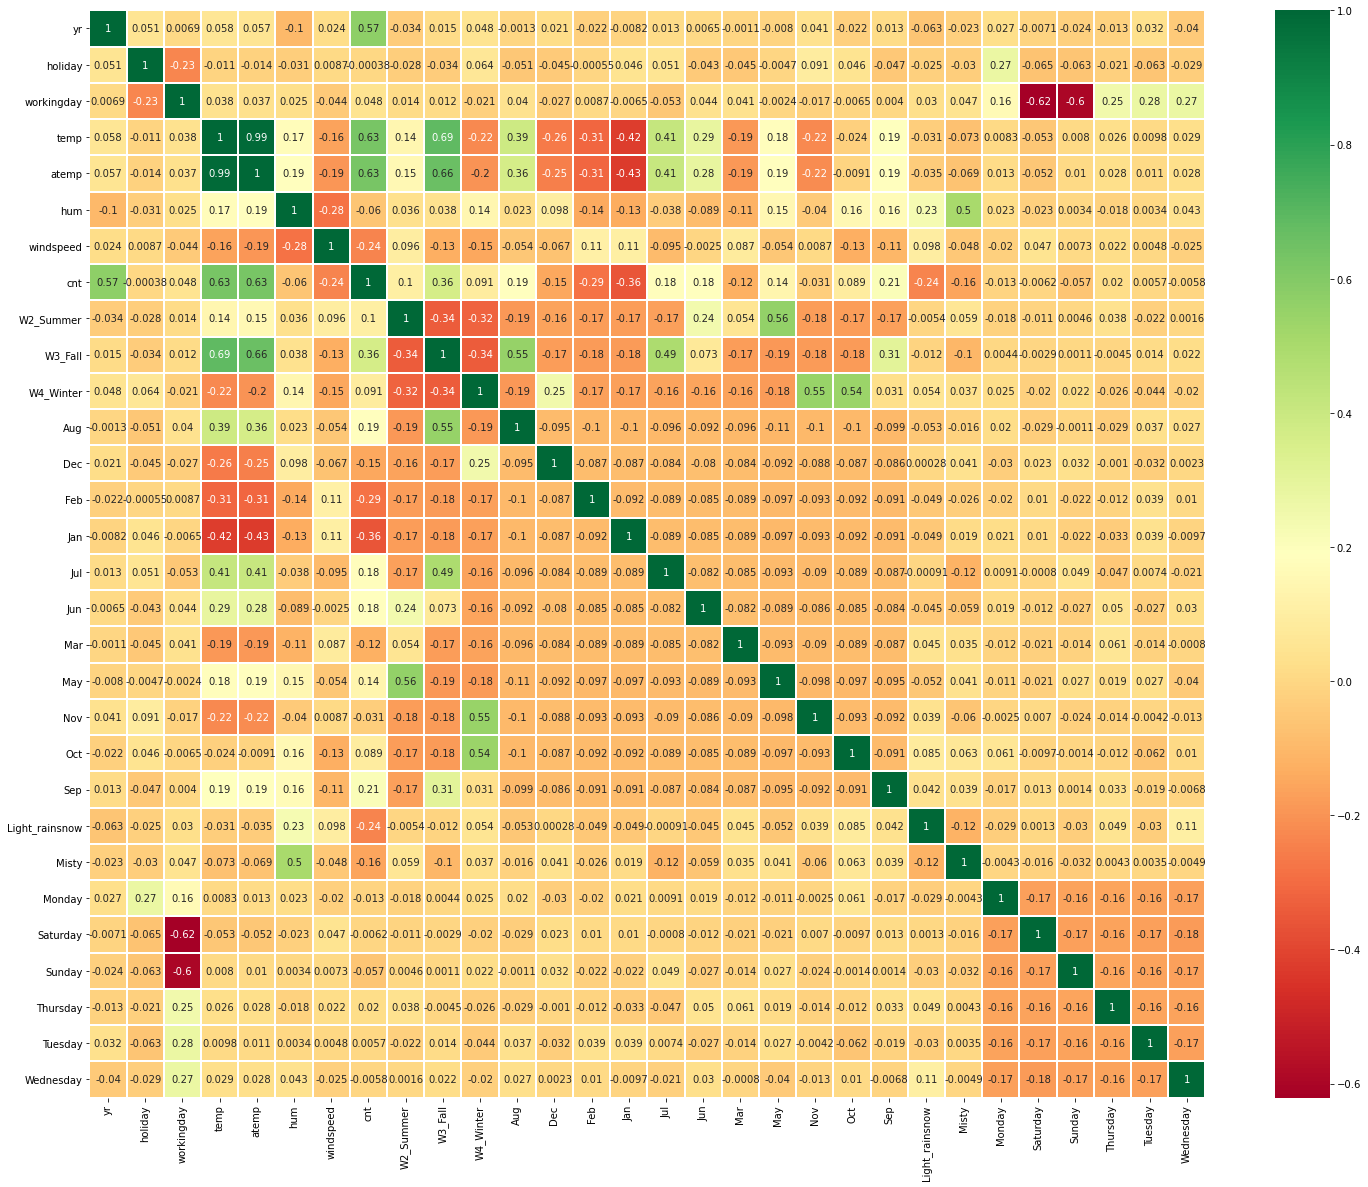

In [56]:
#correlation coefficient

plt.figure(figsize = (25,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

There is multi-colinearity between the variables. 

temp and atemp has very high correlation value of 0.99. we can use only one of these two variables
workingday variable has high negative correlation with Sat & Sun (where workingday =0)
Spring is negatively correlated with cnt
emp, atemp and yr has strong correlation with cnt
misty weather and humidity has correlation
various months and corresponding weather has correlation

build a linear regression model

In [58]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [59]:
# Running RFE-Recursive feature elimination- with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [60]:
# Checking which parameters have been selected in that list of 15

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('W2_Summer', True, 1),
 ('W3_Fall', True, 1),
 ('W4_Winter', True, 1),
 ('Aug', False, 13),
 ('Dec', False, 4),
 ('Feb', False, 9),
 ('Jan', False, 8),
 ('Jul', False, 5),
 ('Jun', False, 12),
 ('Mar', True, 1),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', False, 2),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 14),
 ('Tuesday', False, 10),
 ('Wednesday', False, 15)]

In [61]:
# storing the selected 15 variables in col list

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'W2_Summer', 'W3_Fall', 'W4_Winter', 'Mar', 'Sep', 'Light_rainsnow',
       'Saturday', 'Sunday'],
      dtype='object')

In [62]:
# checking which columns have been eleminated 

X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'May', 'Nov', 'Oct', 'Misty',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [63]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [64]:
# Function for VIF Calculation

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,57.84
4,atemp,53.32
2,workingday,29.90
13,Saturday,7.28
14,Sunday,7.03
8,W3_Fall,5.10
7,W2_Summer,2.59
1,holiday,2.00
9,W4_Winter,1.99
5,hum,1.28


In [66]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          5.51e-182
Time:                        14:58:13   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2019      0.022      9.

In [67]:
X_train_new = X_train_rfe.drop(['atemp'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,workingday,29.68
12,Saturday,7.22
13,Sunday,6.97
7,W3_Fall,5.04
3,temp,3.40
6,W2_Summer,2.59
1,holiday,2.00
8,W4_Winter,1.99
4,hum,1.28
5,windspeed,1.18


In [68]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     176.3
Date:                Sun, 07 Nov 2021   Prob (F-statistic):          5.51e-182
Time:                        14:58:47   Log-Likelihood:                 495.78
No. Observations:                 510   AIC:                            -961.6
Df Residuals:                     495   BIC:                            -898.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2019      0.022      9.